### 0. import essential modules

In [1]:
from scipy.stats import gamma
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. (60%) Work with _Rain_MD-Androy-Bekily_1M_19810101-20211231_CHIRPS.csv_, and complete the following tasks.

#### 1.1 (15%) Import CSV data file _Rain_MD-Androy-Bekily_1M_19810101-20211231_CHIRPS.csv_, make column 'datetime' datetime format and display the first 5 rows of data.

In [2]:
# read csv file as a pandas dataframe
path='Data/Rain_MD-Androy-Bekily_1M_19810101-20211231_CHIRPS.csv'
df = pd.read_csv(path)

# make 'datetime' format
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# display the first 5 rows
print(df.head(5))

            1_9943  1_9944  1_10131  1_10132  1_10133  1_10134  1_10317  \
date                                                                      
1981-01-01   82.06   80.95    84.23    83.12    82.00    80.98    87.78   
1981-02-01  152.77  153.48   152.22   152.93   153.66   154.88   150.23   
1981-03-01   58.34   58.47    58.37    58.49    58.61    58.83    57.85   
1981-04-01    8.74    8.81     8.65     8.71     8.77     8.86     8.37   
1981-05-01   25.97   25.96    25.59    25.63    25.65    25.65    24.77   

            1_10318  1_10319  1_10320  ...  1_20919  1_20920  1_20921  \
date                                   ...                              
1981-01-01    87.17    86.35    85.42  ...   121.83   122.46   122.91   
1981-02-01   151.02   151.85   152.57  ...   200.76   200.24   199.77   
1981-03-01    58.09    58.32    58.50  ...    79.52    78.95    78.13   
1981-04-01     8.46     8.56     8.64  ...    10.07    10.14    10.18   
1981-05-01    24.93    25.09    25.2

#### 1.2 (15% + 15%) Assuming that Gamma distribution is a suitable distribution for the monthly rainfall, please fit the January rainfall for location '1_14125' with MLE and MoM methods and output the fitted parameters (using _print_), respectively.


#### Note: the print output shall look like below:

The fitting result (MLE): shape = xxxxx, scale = yyyyy</br>
The fitting result (MoM): shape = xxxxx, scale = yyyyy

In [3]:
# Filter Rain data for January and the location of interest
rainfall_14125 = df.loc[:, ['1_14125']]
rainfall_january_14125 = rainfall_14125[rainfall_14125.index.month == 1]

# Fit gamma distribution with MLE
data = rainfall_january_14125['1_14125']
MLE_result = gamma.fit(data, floc=0)

# Fit gamma distribution with MoM
MoM_shape = (np.mean(data)**2) / (np.std(data, ddof=1)**2)
MoM_scale = (np.std(data, ddof=1)**2) / np.mean(data)

# Print MLE and MoM fitting result
print(f"The fitting result (MLE): shape = {MLE_result[0]}, scale = {MLE_result[2]}")
print(f"The fitting result (MoM): shape = {MoM_shape}, scale = {MoM_scale}")

The fitting result (MLE): shape = 3.2371429499313242, scale = 55.20111567603629
The fitting result (MoM): shape = 3.513945582258046, scale = 50.85278023121704


#### 1.3 (15%) Perform visual inspection on the above fitting result by plotting the histogram* from the rainfall data and the pdf of two fitted Gamma distribution in a single plot.

#### Note: Please calculate the fixed bin width $\nu$ (and thus number of bins) using the equation below:
$\nu=3.49sN^{-1/3}$
#### where $N$ is the number of data and $s$ is the sample standard deviation computed from data. Please print out the number of bins obtained and display the plot.


#### Note: the print output shall look like below:

Number of bins for the histogram: xxxx

#### Note for the plot:
* The size of the plot is 6-inch width and 4-inch height.
* The x-axis is for rainfall values and the y-axis for relative frequency (or density), respectively. There shall be plot title ('Prob. fit'), legend ('empirical' for histogram, 'fitted-gamma (MLE)' and 'fitted-gamma (MoM)' for fitted gamma pdfs) and text labels for x-axis ('rain (mm)') and y-axis ('Probability/relative frequency') for the plot.


In [4]:
# Calculate bin width, then number of bins
N = len(data)
s = np.std(data, ddof=1)
bin_width = 3.49 * s * (N**(-1/3))
data_range = max(data) - min(data)
bin_num = int(np.ceil(data_range/bin_width))

# print the calculated number of bins
print(f"Number of bins for the histogram: {bin_num}")

Number of bins for the histogram: 5


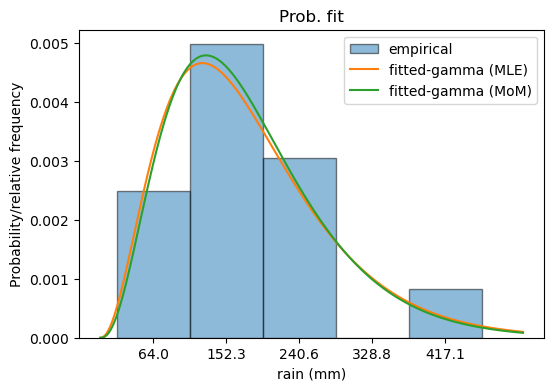

In [5]:
# Plot histogram
plt.figure(figsize=(6, 4))
hist, bins = np.histogram(data, bins=bin_num)
bin_middle = (bins[:-1] + bins[1:])/2
plt.hist(data, bins=bin_num, density=True, edgecolor='black', alpha=0.5, label='empirical')
plt.xticks(np.arange(bin_middle[0], bins[-1], (bin_middle[1] - bin_middle[0])))

# Plot fitted pdfs
x = np.linspace(0, max(data)+50, 1000)
MLE_pdf = gamma.pdf(x, MLE_result[0], MLE_result[1], MLE_result[2])
MoM_pdf = gamma.pdf(x, a=MoM_shape, scale=MoM_scale)
plt.plot(x, MLE_pdf, label='fitted-gamma (MLE)')
plt.plot(x, MoM_pdf, label='fitted-gamma (MoM)')

# Display the plot
plt.title('Prob. fit')
plt.xlabel('rain (mm)')
plt.ylabel('Probability/relative frequency')
plt.legend()
plt.show()

### 2. (40%) From the attached data file _ETH-Kobo_Jan.csv_, you can find historical January rainfall for 1993-2020 in Kobo, Ethiopia.

#### 2.1 (10%) Import CSV data file _ETH-Kobo_Jan.csv_, and get historical January rainfall for 1993-2020 at 'Kobo' column and print the sample mean of the rainfall.

#### Note: the print output shall look like below:

Sample mean is: XXXX (4-decimal places)

In [6]:
# Import CSV and extract rainfall values
path2='Data/ETH-Kobo_Jan.csv'
df2 = pd.read_csv(path2)

# Calculate sample mean and print out result
samples = df2['Kobo']
sample_mean = np.mean(samples)
print(f"Sample mean is: {sample_mean:.4f}")

Sample mean is: 64.1920


#### 2.2 (30%) Find the 95% (two-sided) confidence level for the population mean using empirical bootstrapping (please set the number of bootstraps as 100 and random seed to 0) and print the confidence intervals.

#### Note: the print output shall look like below:

The bootstrapped confidence interval is: [lower, upper] (4-decimal places)

In [7]:
# Set random seed to 0
np.random.seed(0)

# Conduct bootstrapping
nBootstraps = 100
nSamples = len(samples)
np_samples = np.array(samples)
resamples_mean = np.zeros(nBootstraps)

for b in range(nBootstraps):
    resamples_b = np.random.choice(np_samples, size = nSamples, replace=True)
    mean_resamples_b = np.mean(resamples_b)
    resamples_mean[b] = mean_resamples_b

delta_mean =  resamples_mean - sample_mean

# Obtain the lower and upper CI limits
CI_mean_lower, CI_mean_upper = sample_mean - np.percentile(delta_mean,[97.5,2.5])

# Print result
print(f"The bootstrapped confidence interval is: [{CI_mean_lower:.4f}, {CI_mean_upper:.4f}]")

The bootstrapped confidence interval is: [43.6465, 83.6796]
